Exercise: select fields within 500m from the wells
This time, we will do a selection the other way around. Can you find and plot the field polygons (stored in fields_cropped.shp), which intersect the 500m radius of any wells (stored in brogmwvolledigeset.zip)?

Hint1: brogmwvolledigeset.zip is in CRS 4326. Don’t forget the CRS conversion.
Hint2: brogmwvolledigeset.zip is big. To improve the performance, you may want to crop it first.

In [1]:
import geopandas as gpd


In [21]:
wells=gpd.read_file("data/brogmwvolledigeset.zip")

In [22]:
fields=gpd.read_file("data/brpgewaspercelen_definitief_2020_small.gpkg")

In [23]:
(xmin,ymin, xmax, ymax)=fields.total_bounds

In [24]:
br=500#buffert radius

<Axes: >

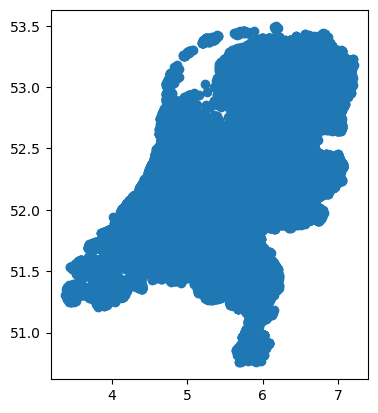

In [26]:
wells.plot()

In [30]:
clipped_wells=wells.cx[xmin-br:xmax+br,ymin-br:ymax+br]

ValueError: aspect must be finite and positive 

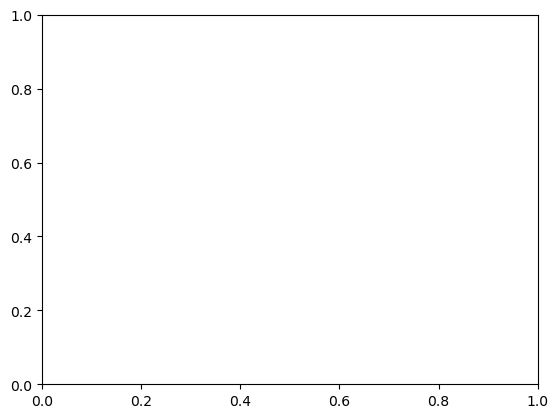

In [31]:
clipped_wells.plot()

In [4]:
wells.crs

<Geographic 2D CRS: EPSG:4258>
Name: ETRS89
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Moldova; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain; Sweden; Switzerland; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-16.1, 32.88, 40.18, 84.73)
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [5]:
fields = fields.to_crs(epsg=4258)

In [6]:
fields.crs

<Geographic 2D CRS: EPSG:4258>
Name: ETRS89
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Moldova; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain; Sweden; Switzerland; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-16.1, 32.88, 40.18, 84.73)
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
buffer = wells.buffer(500)

C:\Users\Pirouz\AppData\Local\Temp\ipykernel_9148\1357553362.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer = wells.buffer(500)


In [9]:
wells_buffer = wells.copy()
wells_buffer["geometry"] = buffer

In [10]:
wells_buffer_dissolve = wells_buffer.dissolve()

In [12]:
fields_buffer = fields.clip(wells_buffer_dissolve)
# fields_clip = fields.clip(wells)


<Axes: >

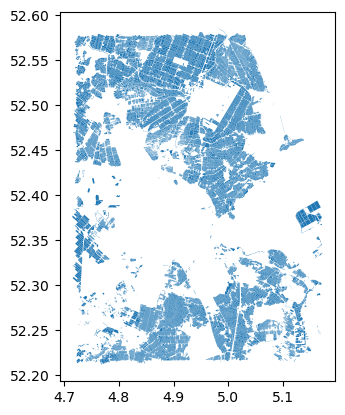

In [13]:
fields_buffer.plot()